# POSTTEST6

Import LIbrary

In [16]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, accuracy_score
from tensorflow.keras import Sequential,layers,optimizers
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

Baca datasetnya beserta pengaturannya

In [17]:
data = pd.read_csv('tornados.csv',encoding="utf-8")

# copy dataset aslinya supaya tidak rusak data asli

In [18]:
data_copy = data.copy()

In [19]:
# menghapus atribut nilai null
data.dropna(inplace=True) 
data.isna().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

copy dataset aslinya supaya tidak rusak data asli

In [20]:
data_copy.dtypes

om                int64
yr                int64
mo                int64
dy                int64
date             object
time             object
tz               object
datetime_utc     object
st               object
stf               int64
mag             float64
inj               int64
fat               int64
loss            float64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
ns                int64
sn                int64
f1                int64
f2                int64
f3                int64
f4                int64
fc                 bool
dtype: object

# PREPROCESSING DATA

In [21]:
data['fc'] = data.apply(lambda row: 1 if row['fc'] == True else 0,  axis=1)

# Split Data

membuat split data nya sesuai target yg diinginkan

In [22]:
x = data[['om','stf','mag',]]
y = data['fc']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 42)

# DNN

Membuat Model Sequential

In [23]:
model_seq = Sequential([
   layers.Dense(8, activation='relu',input_shape =(None,3)),
   layers.Dense(16, activation='relu',input_shape =(None,3)),
    layers.Dense(1, activation='sigmoid',input_shape =(None,3)),
])

Melakukan Summary Modelnya

In [24]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 8)           32        
                                                                 
 dense_4 (Dense)             (None, None, 16)          144       
                                                                 
 dense_5 (Dense)             (None, None, 1)           17        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Melakukan Compile menggunakan optimizer adam dengan loss menggunakan binary_crossentropy, dengan metrics accuracy

In [25]:
model_seq.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

Melakukan training data dengan epochs 20

In [26]:
history = model_seq.fit(X_train,y_train, epochs=20 ,verbose=1, validation_split=0.2)

Epoch 1/20
831/831 [==============================] - 4s 4ms/step - loss: 0.2146 - accuracy: 0.9775 - val_loss: 0.1219 - val_accuracy: 0.9762
Epoch 2/20
831/831 [==============================] - 3s 3ms/step - loss: 0.1120 - accuracy: 0.9775 - val_loss: 0.1160 - val_accuracy: 0.9762
Epoch 3/20
831/831 [==============================] - 3s 3ms/step - loss: 0.1072 - accuracy: 0.9775 - val_loss: 0.1066 - val_accuracy: 0.9762
Epoch 4/20
831/831 [==============================] - 3s 3ms/step - loss: 0.1051 - accuracy: 0.9775 - val_loss: 0.1087 - val_accuracy: 0.9762
Epoch 5/20
831/831 [==============================] - 3s 3ms/step - loss: 0.1037 - accuracy: 0.9775 - val_loss: 0.1099 - val_accuracy: 0.9762
Epoch 6/20
831/831 [==============================] - 3s 3ms/step - loss: 0.1041 - accuracy: 0.9775 - val_loss: 0.1088 - val_accuracy: 0.9762
Epoch 7/20
831/831 [==============================] - 3s 3ms/step - loss: 0.1026 - accuracy: 0.9775 - val_loss: 0.1045 - val_accuracy: 0.9762
Epoch 

Membuat accuracy score

In [27]:
y_pred = model_seq.predict(X_test)
y_pred = (y_pred > 0.5)

260/260 [==============================] - 1s 2ms/step


Lalu model tersebuta dievaluasi

In [28]:
model_seq.evaluate(X_test, y_test)

260/260 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9772


[0.10101330280303955, 0.9772399067878723]

# Grafik

Menampilkan Grafik Akurasi

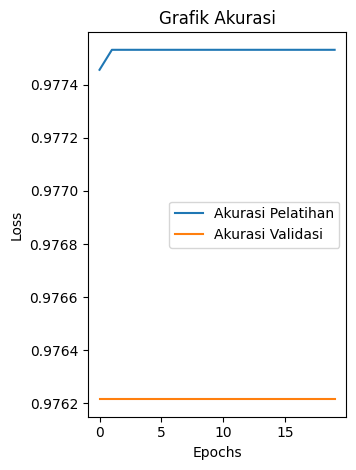

In [31]:
import matplotlib.pyplot as plt


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label = 'Akurasi Validasi')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Grafik Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

Menampilkan Grafik Loss

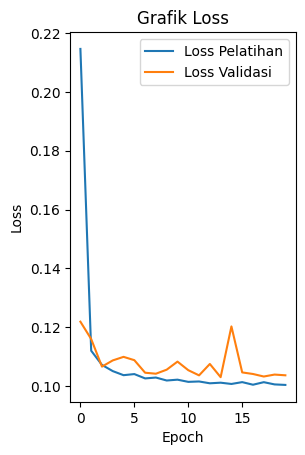

In [32]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')
plt.show()